In [1]:
import requests
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
# def obtener_detalle_pelicula(api_key, id_pelicula):
#     url = f'https://api.themoviedb.org/3/movie/{id_pelicula}'
#     parametros = {
#         'api_key': api_key,
#         'append_to_response': 'reviews',  # Solicitar información adicional de revisiones
#     }

#     try:
#         respuesta = requests.get(url, params=parametros)
#         respuesta.raise_for_status()  # Verifica si hay errores en la solicitud HTTP
#         datos = respuesta.json()

#         # Reemplazar la información detallada de las revisiones con el conteo de revisiones
#         if 'reviews' in datos and 'total_results' in datos['reviews']:
#             conteo_reviews = datos['reviews']['total_results']
#             datos['reviews'] = {'conteo': conteo_reviews}

#         return datos
#     except requests.exceptions.RequestException as e:
#         print(f"Error en la solicitud: {e}")
#         return None



# def obtener_peliculas_por_anio(api_key, anio, limite_paginas=10):
#     url = 'https://api.themoviedb.org/3/discover/movie'
#     parametros = {
#         'api_key': api_key,
#         'primary_release_year': anio,
#     }

#     todas_las_peliculas = []

#     # Hacer solicitudes sucesivas para obtener hasta 500 páginas
#     pagina = 1
#     while pagina <= limite_paginas:
#         parametros['page'] = pagina

#         try:
#             respuesta = requests.get(url, params=parametros)
#             respuesta.raise_for_status()  # Verifica si hay errores en la solicitud HTTP
#             datos = respuesta.json()

#             if 'results' in datos:
#                 todas_las_peliculas.extend(datos['results'])

#                 # Verificar si hay más páginas disponibles
#                 if pagina < datos['total_pages']:
#                     pagina += 1
#                 else:
#                     break
#             else:
#                 break
#         except requests.exceptions.RequestException as e:
#             print(f"Error en la solicitud: {e}")
#             break

#     return todas_las_peliculas

# def crear_dataframe(peliculas):
#     datos_peliculas = []

#     for pelicula in peliculas:
#         # Obtener detalles adicionales de cada película
#         detalles = obtener_detalle_pelicula(tmdb_api_key, pelicula['id'])

#         if detalles:
#             # Extraer la información necesaria
#             nombre = detalles['title']
#             generos = [genero['name'] for genero in detalles.get('genres', [])]
#             fecha_lanzamiento = detalles['release_date']
#             duracion = detalles.get('runtime', None)

#             # Manejar casos en los que la información de créditos no está presente
#             credits = detalles.get('credits', {})

#             # Manejar casos en los que la información de productoras no está presente
#             production_companies = detalles.get('production_companies', [])
#             productora = production_companies[0]['name'] if production_companies else None

#             # Nuevos datos: Presupuesto y Dinero recaudado
#             presupuesto = detalles.get('budget', None)
#             dinero_recaudado = detalles.get('revenue', None)

#             # Nuevos datos: Ratings y Reviews
#             ratings = detalles.get('vote_average', None)

#             # Agregar los datos a la lista
#             datos_peliculas.append({
#                 'Nombre': nombre,
#                 'Genero': generos,
#                 'Fecha de lanzamiento': fecha_lanzamiento,
#                 'Duracion': duracion,
#                 'Productora cinematografica': productora,
#                 'Presupuesto': presupuesto,
#                 'Recaudacion': dinero_recaudado,
#                 'Ratings': ratings,
#             })

#     return pd.DataFrame(datos_peliculas)

         
# if __name__ == '__main__':
#     # Ingresa tu clave de API de TMDb
#     tmdb_api_key = '####'

#     # Ingresa el rango de años para obtener películas (2010 al 2023)
#     anios_busqueda = range(2010, 2024)

#     todas_las_peliculas = []

#     for anio_busqueda in anios_busqueda:
#         peliculas = obtener_peliculas_por_anio(tmdb_api_key, anio_busqueda)

#         if peliculas:
#             todas_las_peliculas.extend(peliculas)
#         else:
#             print(f'No se encontraron películas para el año {anio_busqueda}.')

#     if todas_las_peliculas:
#         # Crear DataFrame con información detallada
#         df_peliculas = crear_dataframe(todas_las_peliculas)

#         # Imprimir el DataFrame
#         print("DataFrame de películas:")
#         print(df_peliculas)

#         # Guardar el DataFrame en un archivo CSV (opcional)
#         df_peliculas.to_csv('peliculas_2010_2023.csv', index=False)
#     else:
#         print('No se encontraron películas en el rango de años especificado.')

In [3]:

# Cargar el DataFrame
peliculas_2010_2023 = 'peliculas_2010_2023'
df_peliculas_2010_2023 = pd.read_csv(peliculas_2010_2023 + str('.csv'))

# Filtrar y reiniciar los índices
df_peliculas_2010_2023 = df_peliculas_2010_2023.loc[(df_peliculas_2010_2023['Duracion'] >= 75) & (df_peliculas_2010_2023['Presupuesto'] != 0)].reset_index()

# Eliminar columnas no deseadas
df_peliculas_2010_2023 = df_peliculas_2010_2023.drop(labels=['Director', 'index', 'Reviews'], axis=1)

# Definir conversiones de tipos de datos
conversiones = {
    'Nombre': 'object',
    'Genero': 'category',
    'Fecha de lanzamiento': 'datetime64',
    'Duracion': 'int64',
    'Presupuesto': 'int64',
    'Recaudacion': 'int64',
}

# Aplicar conversiones de tipo de datos
df_peliculas_2010_2023 = df_peliculas_2010_2023.astype(conversiones)

# Convertir Presupuesto y Recaudacion a millones
df_peliculas_2010_2023['Presupuesto'] = df_peliculas_2010_2023['Presupuesto'] / (1 * (10) ** 6)
df_peliculas_2010_2023['Recaudacion'] = df_peliculas_2010_2023['Recaudacion'] / (1 * (10) ** 6)

# Filtrar las filas que cumplen con la condición y reemplazar la columna 'Productora cinematografica'
df_peliculas_2010_2023.loc[df_peliculas_2010_2023['Productora cinematografica'].str.contains('Disney', case=False, na=False), 'Productora cinematografica'] = 'Walt Disney Films'
df_peliculas_2010_2023.loc[df_peliculas_2010_2023['Productora cinematografica'].str.contains('Marvel', case=False, na=False), 'Productora cinematografica'] = 'Marvel Studios Films'
df_peliculas_2010_2023.loc[df_peliculas_2010_2023['Productora cinematografica'].str.contains('Warner', case=False, na=False), 'Productora cinematografica'] = 'Warner Bros Films'


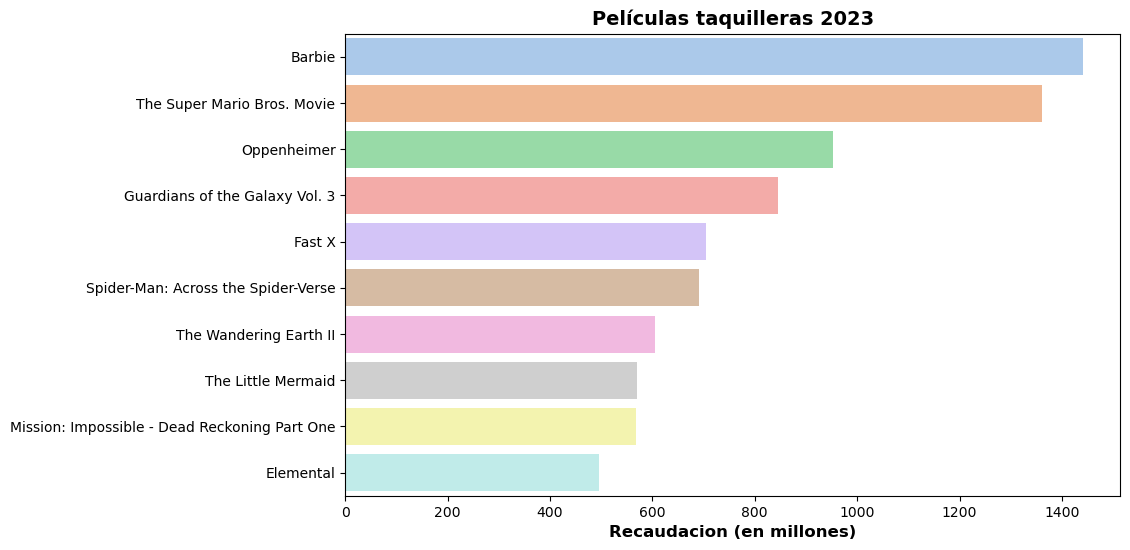

,Fecha de lanzamiento,Productora cinematografica,Nombre,Recaudacion,Año
1686,2023-07-19,LuckyChap Entertainment,Barbie,1441.80000,2023
1659,2023-04-05,Universal Pictures,The Super Mario Bros. Movie,1362.00000,2023
1687,2023-07-19,Syncopy,Oppenheimer,952.00000,2023
1664,2023-05-03,Marvel Studios Films,Guardians of the Galaxy Vol. 3,845.60000,2023
1666,2023-05-17,Universal Pictures,Fast X,704.70966,2023
...,...,...,...,...,...
1653,2023-03-08,Sombrero Films,Let Her Kill You,0.00000,2023
1705,2023-09-22,20th Century Studios,No One Will Save You,0.00000,2023
1731,2023-12-08,Foresight Unlimited,Fast Charlie,0.00000,2023
1732,2023-12-15,The Stone Quarry,Rebel Moon - Part One: A Child of Fire,0.00000,2023


In [4]:
# Agrupar por año y productora cinematográfica
grupo_productora = df_peliculas_2010_2023.groupby(['Fecha de lanzamiento','Productora cinematografica', 'Nombre'])['Recaudacion'].sum().reset_index()
grupo_productora['Año'] = grupo_productora['Fecha de lanzamiento'].dt.year

grupo_productora2023 = grupo_productora.loc[(grupo_productora['Año'] == 2023)]
# Ordenar los datos por 'Recaudacion' de forma descendente
data = grupo_productora2023.sort_values(by='Recaudacion', ascending=False)

# Tomar solo los primeros 10 datos
data_top10 = data.head(10)

# Crear la gráfica de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Recaudacion', y='Nombre', data=data_top10, palette='pastel')

# Configurar el estilo y etiquetas
plt.xlabel('Recaudacion (en millones)', fontsize=12, fontweight='bold', color='k')
plt.title('Películas taquilleras 2023', fontsize=14, fontweight='bold', color='k')

# Eliminar la etiqueta del eje Y
plt.ylabel('')

# Mostrar la gráfica
plt.show()
data

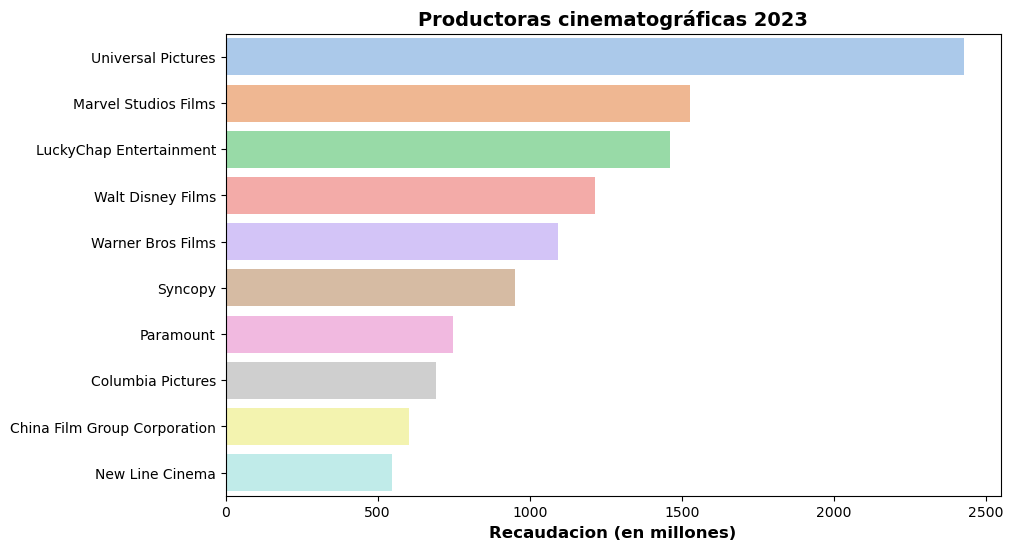

,Productora cinematografica,Recaudacion
66,Universal Pictures,2426.459192
29,Marvel Studios Films,1527.271180
27,LuckyChap Entertainment,1461.113341
68,Walt Disney Films,1212.900000
69,Warner Bros Films,1091.353717
...,...,...
24,Les Films du 24,0.000000
21,Foresight Unlimited,0.000000
3,AGBO,0.000000
70,Wonderfilm Media,0.000000


In [5]:
# Agrupar por año y productora cinematográfica
grupo_productora = df_peliculas_2010_2023.groupby(['Fecha de lanzamiento','Productora cinematografica'])['Recaudacion'].sum().reset_index()
grupo_productora['Año'] = grupo_productora['Fecha de lanzamiento'].dt.year

grupo_productora2023 = grupo_productora.loc[(grupo_productora['Año'] == 2023)]
grupo_productora2023 = grupo_productora2023.groupby(['Productora cinematografica'])['Recaudacion'].sum().reset_index()

# Ordenar los datos por 'Recaudacion' de forma descendente
data = grupo_productora2023.sort_values(by='Recaudacion', ascending=False)

# Tomar solo los primeros 10 datos
data_top10 = data.head(10)
palette = sns.color_palette()

# Crear la gráfica de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Recaudacion', y='Productora cinematografica', data=data_top10, palette='pastel')

# Configurar el estilo y etiquetas
plt.xlabel('Recaudacion (en millones)', fontsize=12, fontweight='bold', color='k')
plt.title('Productoras cinematográficas 2023', fontsize=14, fontweight='bold', color='k')

# Eliminar la etiqueta del eje Y
plt.ylabel('')

# Mostrar la gráfica
plt.show()
data

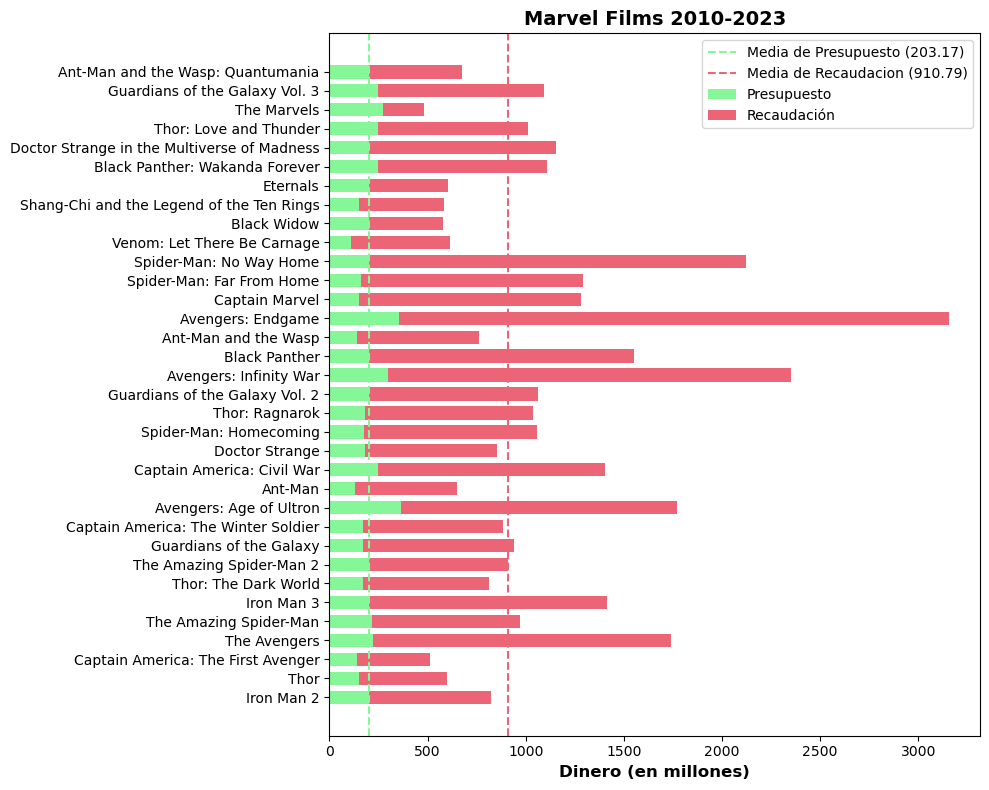

In [6]:
marvel = df_peliculas_2010_2023[df_peliculas_2010_2023['Productora cinematografica'].str.contains('Marvel', case=False, na=False)]

# Obtener los valores de x e y
nombres_peliculas = marvel['Nombre']
presupuestos = marvel['Presupuesto']
dinero_recaudado = marvel['Recaudacion']

# Crear un colormap de colores pastel
cmap_pastel = ListedColormap(['#86f799', '#eb6577'])

# Crear la gráfica de barras horizontales con el colormap de colores pastel
fig, ax = plt.subplots(figsize=(10, 8))
ancho_barra = 0.7

# Configurar las barras horizontales
barra_presupuesto = ax.barh(nombres_peliculas, presupuestos, height=ancho_barra, label='Presupuesto', color=cmap_pastel(0))
barra_recaudado = ax.barh(nombres_peliculas, dinero_recaudado, height=ancho_barra, label='Recaudación', left=presupuestos, color=cmap_pastel(1))

# Configurar el estilo y etiquetas
ax.set_xlabel('Dinero (en millones)', fontsize=12, fontweight='bold', color='k')
ax.set_title('Marvel Films 2010-2023', fontsize=14, fontweight='bold', color='k')

# Calcular las medias
media_presupuesto = presupuestos.mean()
media_dinero_recaudado = dinero_recaudado.mean()

# Dibujar líneas para la media de 'Presupuesto' y 'Dinero Recaudado'
ax.axvline(x=media_presupuesto, color='#86f799', linestyle='--', label=f'Media de Presupuesto ({media_presupuesto:.2f})')
ax.axvline(x=media_dinero_recaudado, color='#eb6577', linestyle='--', label=f'Media de Recaudacion ({media_dinero_recaudado:.2f})')

ax.legend()

# Ajustar el diseño para evitar que las etiquetas se superpongan
plt.tight_layout()

# Mostrar la gráfica de barras horizontales
plt.show()


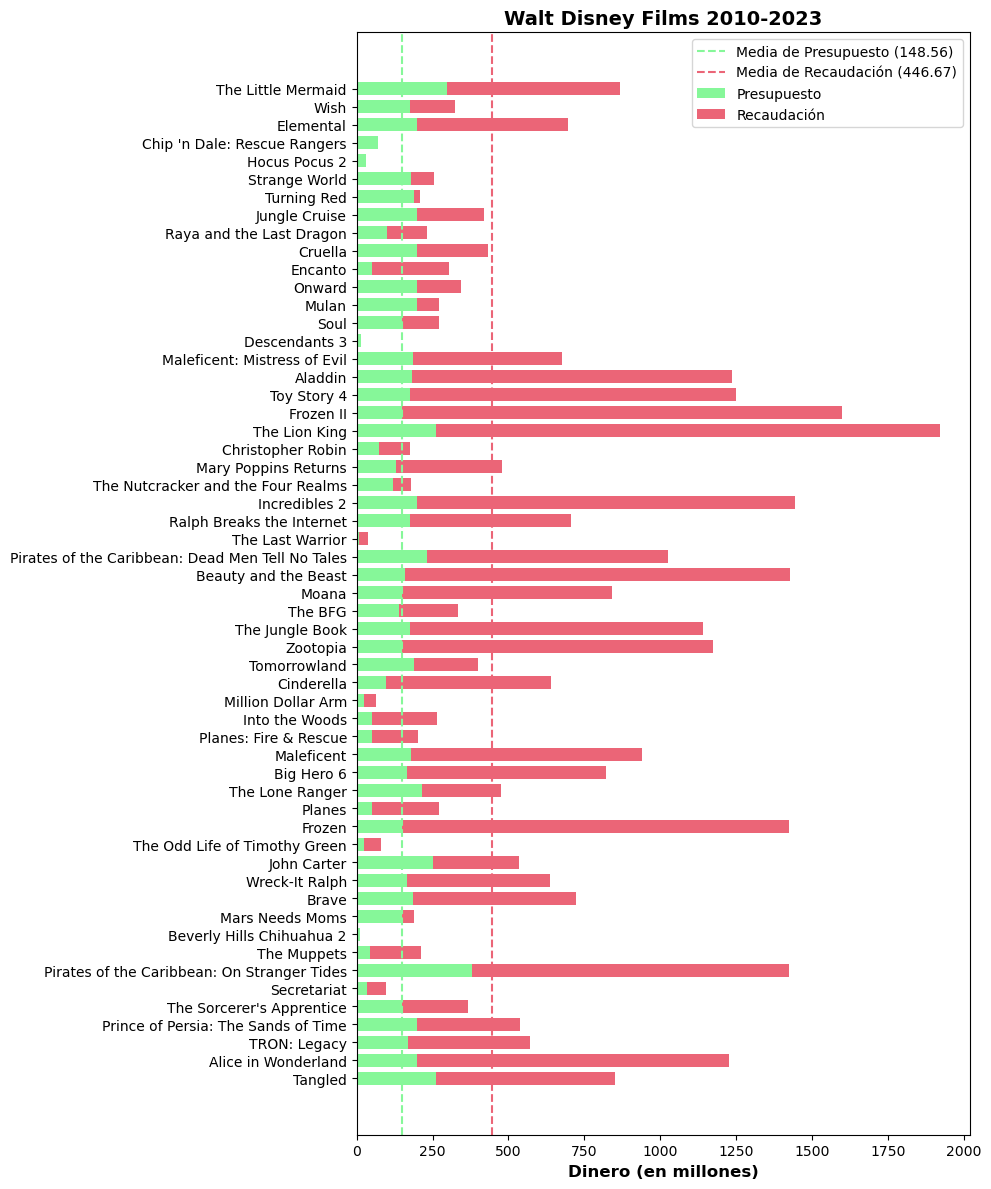

In [7]:
disney = df_peliculas_2010_2023[df_peliculas_2010_2023['Productora cinematografica'].str.contains('Disney', case=False, na=False)]

nombres_peliculas = disney['Nombre']
presupuestos = disney['Presupuesto']
dinero_recaudado = disney['Recaudacion']

# Crear un colormap de colores pastel
cmap_pastel = ListedColormap(['#86f799', '#eb6577'])

# Crear la gráfica de barras horizontales con el colormap de colores pastel
fig, ax = plt.subplots(figsize=(10, 12))
ancho_barra = 0.7

# Configurar las barras horizontales
barra_presupuesto = ax.barh(nombres_peliculas, presupuestos, height=ancho_barra, label='Presupuesto', color=cmap_pastel(0))
barra_recaudado = ax.barh(nombres_peliculas, dinero_recaudado, height=ancho_barra, label='Recaudación', left=presupuestos, color=cmap_pastel(1))

# Configurar el estilo y etiquetas
ax.set_xlabel('Dinero (en millones)', fontsize=12, fontweight='bold', color='k')
ax.set_title('Walt Disney Films 2010-2023', fontsize=14, fontweight='bold', color='k')

# Calcular las medias
media_presupuesto = presupuestos.mean()
media_dinero_recaudado = dinero_recaudado.mean()

# Dibujar líneas para la media de 'Presupuesto' y 'Dinero Recaudado'
ax.axvline(x=media_presupuesto, color='#86f799', linestyle='--', label=f'Media de Presupuesto ({media_presupuesto:.2f})')
ax.axvline(x=media_dinero_recaudado, color='#eb6577', linestyle='--', label=f'Media de Recaudación ({media_dinero_recaudado:.2f})')
ax.legend()
# Ajustar el diseño para evitar que las etiquetas se superpongan
plt.tight_layout()

# Mostrar la gráfica de barras horizontales
plt.show()



C:\Users\end_w\AppData\Local\Temp\ipykernel_11648\553355936.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(nombres_peliculas,fontsize=9)


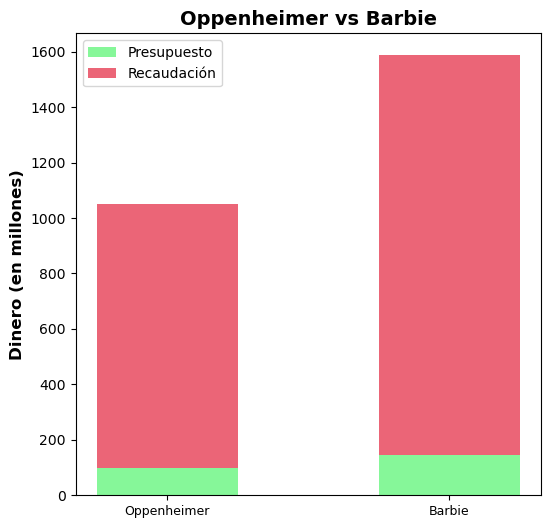

In [8]:

barbieheimer = df_peliculas_2010_2023.loc[(df_peliculas_2010_2023['Nombre'] == 'Oppenheimer') | (df_peliculas_2010_2023['Nombre'] == 'Barbie')]

# Obtener los valores de x e y
nombres_peliculas = barbieheimer['Nombre']
presupuestos = barbieheimer['Presupuesto']
dinero_recaudado = barbieheimer['Recaudacion']
# Crear un colormap de colores pastel
cmap_pastel = ListedColormap(['#86f799','#eb6577'])

# Crear la gráfica de barras con el colormap de colores pastel
fig, ax = plt.subplots(figsize=(6, 6))
ancho_barra = 0.5

# Configurar las barras
barra_presupuesto = ax.bar(nombres_peliculas, presupuestos, width=ancho_barra, label='Presupuesto', color=cmap_pastel(0))
barra_recaudado = ax.bar(nombres_peliculas, dinero_recaudado, width=ancho_barra, label='Recaudación', bottom=presupuestos, color=cmap_pastel(1))

# Configurar el estilo y etiquetas
ax.set_ylabel('Dinero (en millones)',fontsize=12, fontweight='bold', color='k')
ax.set_title('Oppenheimer vs Barbie',fontsize=14, fontweight='bold', color='k')
ax.set_xticklabels(nombres_peliculas,fontsize=9)
ax.legend()

# Mostrar la gráfica de barras
plt.show()

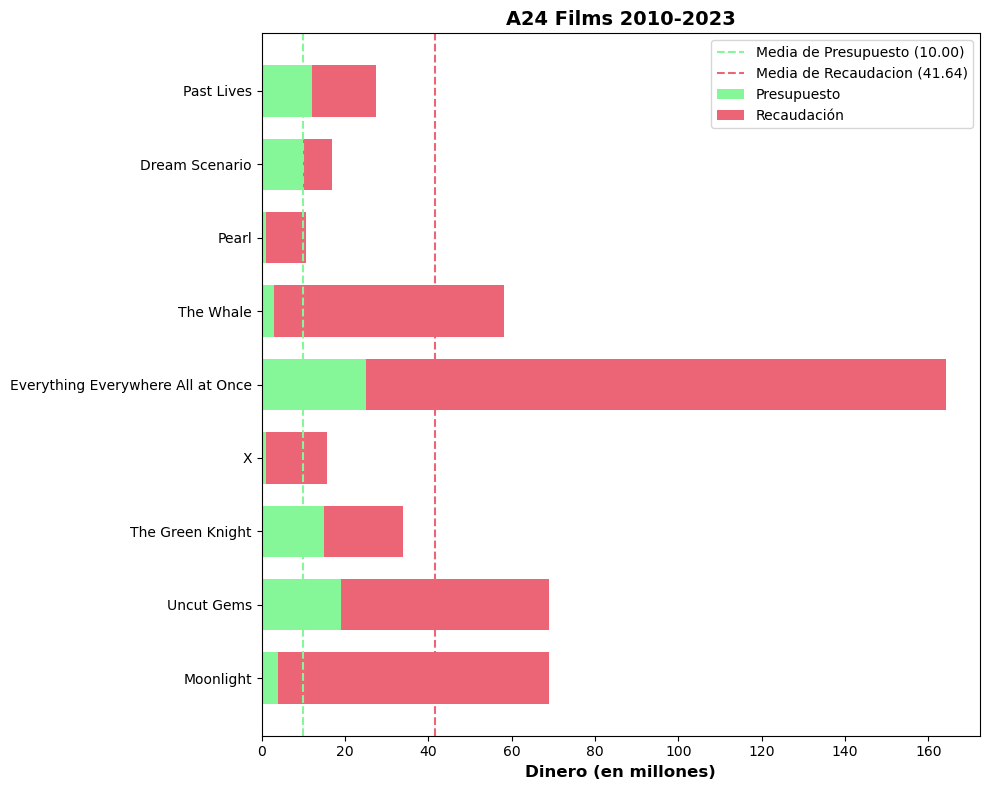

In [9]:
a24 = df_peliculas_2010_2023[df_peliculas_2010_2023['Productora cinematografica'].str.contains('A24', case=False, na=False)]
# Obtener los valores de x e y
nombres_peliculas = a24['Nombre']
presupuestos = a24['Presupuesto']
dinero_recaudado = a24['Recaudacion']
recaudado = a24['Recaudacion'].sum()

# Crear un colormap de colores pastel
cmap_pastel = ListedColormap(['#86f799','#eb6577'])

# Crear la gráfica de barras horizontales con el colormap de colores pastel
fig, ax = plt.subplots(figsize=(10, 8))
ancho_barra = 0.7

# Configurar las barras horizontales
barra_presupuesto = ax.barh(nombres_peliculas, presupuestos, height=ancho_barra, label='Presupuesto', color=cmap_pastel(0))
barra_recaudado = ax.barh(nombres_peliculas, dinero_recaudado, height=ancho_barra, label='Recaudación', left=presupuestos, color=cmap_pastel(1))

# Configurar el estilo y etiquetas
ax.set_xlabel('Dinero (en millones)', fontsize=12, fontweight='bold', color='k')
ax.set_title('A24 Films 2010-2023', fontsize=14, fontweight='bold', color='k')

# Calcular las medias
media_presupuesto = presupuestos.mean()
media_dinero_recaudado = dinero_recaudado.mean()

# Dibujar líneas para la media de 'Presupuesto' y 'Dinero Recaudado'
ax.axvline(x=media_presupuesto, color='#86f799', linestyle='--', label=f'Media de Presupuesto ({media_presupuesto:.2f})')
ax.axvline(x=media_dinero_recaudado, color='#eb6577', linestyle='--', label=f'Media de Recaudacion ({media_dinero_recaudado:.2f})')

ax.legend()

# Ajustar el diseño para evitar que las etiquetas se superpongan
plt.tight_layout()

# Mostrar la gráfica de barras horizontales
plt.show()



In [10]:
a24

,Nombre,Genero,Fecha de lanzamiento,Duracion,Productora cinematografica,Presupuesto,Recaudacion,Ratings
951,Moonlight,['Drama'],2016-10-21,111,A24,4.0,65.046687,7.393
1350,Uncut Gems,"['Drama', 'Thriller', 'Crime']",2019-08-30,136,A24,19.0,50.000000,7.147
1544,The Green Knight,"['Adventure', 'Drama', 'Fantasy']",2021-07-29,130,A24,15.0,18.888418,6.586
1561,X,"['Horror', 'Thriller', 'Mystery']",2022-03-17,106,A24,1.0,14.700000,6.747
1576,Everything Everywhere All at Once,"['Action', 'Adventure', 'Science Fiction']",2022-03-24,140,A24,25.0,139.200000,7.812
1590,The Whale,['Drama'],2022-12-09,117,A24,3.0,55.101305,7.909
1611,Pearl,"['Drama', 'Horror']",2022-09-16,102,A24,1.0,9.700000,7.300
1687,Dream Scenario,"['Comedy', 'Fantasy']",2023-11-10,102,A24,10.0,6.777038,7.090
1708,Past Lives,"['Drama', 'Romance']",2023-06-02,106,A24,12.0,15.348213,7.916


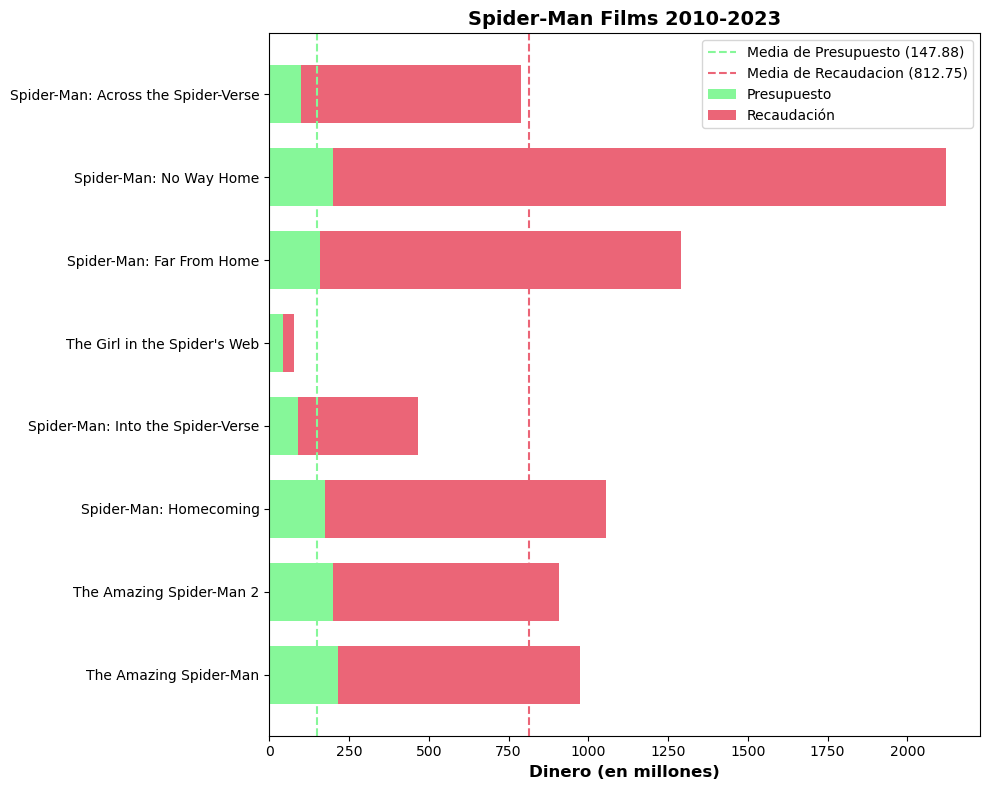

In [11]:
spyderman = df_peliculas_2010_2023[df_peliculas_2010_2023['Nombre'].str.contains('Spider', case=False, na=False)]

nombres_peliculas = spyderman['Nombre']
presupuestos = spyderman['Presupuesto']
dinero_recaudado = spyderman['Recaudacion']
recaudado = spyderman['Recaudacion'].sum()

# Crear un colormap de colores pastel
cmap_pastel = ListedColormap(['#86f799', '#eb6577'])

# Crear la gráfica de barras horizontales con el colormap de colores pastel
fig, ax = plt.subplots(figsize=(10, 8))
ancho_barra = 0.7

# Configurar las barras horizontales
barra_presupuesto = ax.barh(nombres_peliculas, presupuestos, height=ancho_barra, label='Presupuesto', color=cmap_pastel(0))
barra_recaudado = ax.barh(nombres_peliculas, dinero_recaudado, height=ancho_barra, label='Recaudación', left=presupuestos, color=cmap_pastel(1))

# Configurar el estilo y etiquetas
ax.set_xlabel('Dinero (en millones)', fontsize=12, fontweight='bold', color='k')
ax.set_title('Spider-Man Films 2010-2023', fontsize=14, fontweight='bold', color='k')

# Calcular las medias
media_presupuesto = presupuestos.mean()
media_dinero_recaudado = dinero_recaudado.mean()

# Dibujar líneas para la media de 'Presupuesto' y 'Dinero Recaudado'
ax.axvline(x=media_presupuesto, color='#86f799', linestyle='--', label=f'Media de Presupuesto ({media_presupuesto:.2f})')
ax.axvline(x=media_dinero_recaudado, color='#eb6577', linestyle='--', label=f'Media de Recaudacion ({media_dinero_recaudado:.2f})')
ax.legend()
# Ajustar el diseño para evitar que las etiquetas se superpongan
plt.tight_layout()

# Mostrar la gráfica de barras horizontales
plt.show()


In [12]:
# # Crear una nueva columna 'Año' que extraiga el año de la fecha de lanzamiento
# horror_2010_2023['Año'] = horror_2010_2023['Fecha de lanzamiento'].dt.year

# # Filtrar las películas de género 'Horror'
# peliculas_horror = horror_2010_2023[horror_2010_2023['Genero'].apply(lambda x: 'Horror' in x)]

# # Contar el número de películas de 'Horror' por año
# conteo_por_año = peliculas_horror['Año'].value_counts().sort_index()

# # Calcular la suma acumulativa por año
# suma_acumulativa = conteo_por_año.cumsum()

# # Crear la gráfica
# plt.figure(figsize=(10, 6))
# plt.plot(suma_acumulativa.index, suma_acumulativa.values, marker='o', linestyle='-', color='k')
# plt.title('Suma Acumulativa de Películas de Horror por Año', fontsize=14, fontweight='bold', color='k')
# plt.xlabel('Año', fontsize=12, fontweight='bold', color='k')
# plt.ylabel('Suma Acumulativa de Películas', fontsize=12, fontweight='bold', color='k')

# plt.show()

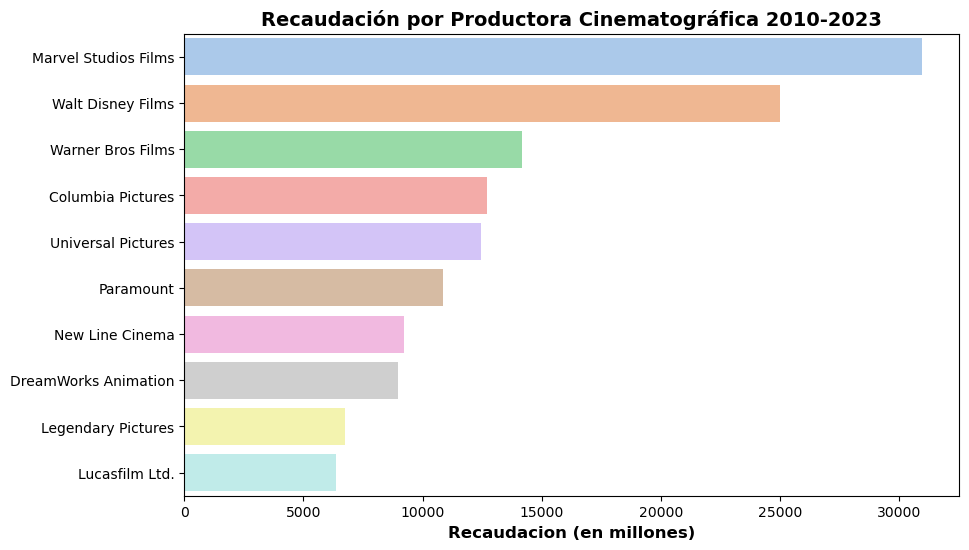

,index,Productora cinematografica,Recaudacion
0,398,Marvel Studios Films,30966.987045
1,724,Walt Disney Films,25013.399765
2,727,Warner Bros Films,14160.556180
3,154,Columbia Pictures,12716.892718
4,700,Universal Pictures,12443.023441
5,473,Paramount,10845.870368
6,435,New Line Cinema,9234.636385
7,198,DreamWorks Animation,8952.621781
8,356,Legendary Pictures,6730.526679
9,378,Lucasfilm Ltd.,6358.363857


In [13]:
# Agrupar por año y productora cinematográfica
grupo_productora = df_peliculas_2010_2023.groupby('Productora cinematografica')['Recaudacion'].sum().reset_index()
# Ordenar los datos por 'Recaudacion' de forma descendente
data = grupo_productora.sort_values(by='Recaudacion', ascending=False)

# Tomar solo los primeros 10 datos
data_top10 = data.head(10).reset_index()

# Crear la gráfica de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Recaudacion', y='Productora cinematografica', data=data_top10, palette='pastel')

# Configurar el estilo y etiquetas
plt.xlabel('Recaudacion (en millones)', fontsize=12, fontweight='bold', color='k')
plt.title('Recaudación por Productora Cinematográfica 2010-2023', fontsize=14, fontweight='bold', color='k')

# Eliminar la etiqueta del eje Y
plt.ylabel('')

# Mostrar la gráfica
plt.show()

data_top10

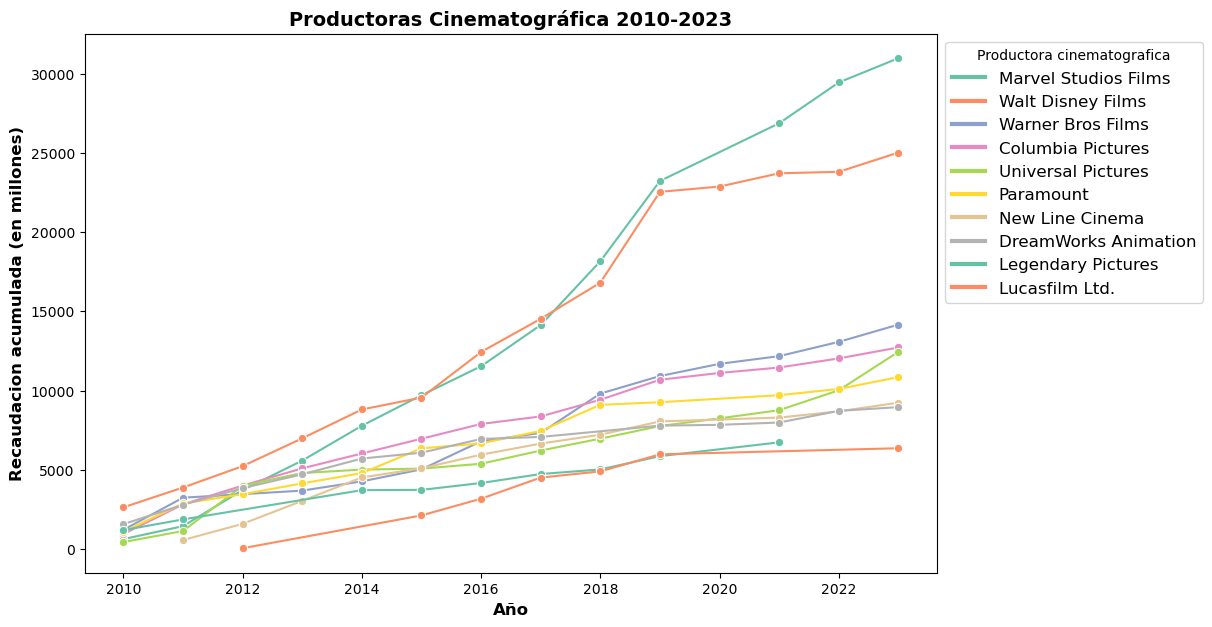

In [14]:
# Crear una nueva columna 'Año' que extraiga el año de la fecha de lanzamiento
df_peliculas_2010_2023['Año'] = df_peliculas_2010_2023['Fecha de lanzamiento'].dt.year

# Agrupar por año y productora cinematográfica, y calcular la suma acumulativa
grupo_productora = df_peliculas_2010_2023.groupby(['Productora cinematografica', 'Año'])['Recaudacion'].sum().reset_index()
grupo_productora['Recaudacion acumulada'] = grupo_productora.groupby('Productora cinematografica')['Recaudacion'].cumsum()

# Filtrar solo las productoras cinematográficas en 'data_top10'
grupo_top10 = grupo_productora[grupo_productora['Productora cinematografica'].isin(data_top10['Productora cinematografica'])]

# # Definir una paleta de colores personalizada
colores = sns.color_palette('Set2', n_colors=len(data_top10))
# palette = sns.color_palette("mako_r", 6)

# Ordenar las etiquetas de la leyenda según la última suma acumulativa
leyendas_ordenadas = grupo_top10.groupby('Productora cinematografica')['Recaudacion acumulada'].max().sort_values(ascending=False).index


# Crear la gráfica de líneas con la paleta de colores y las leyendas ordenadas
plt.figure(figsize=(11, 7))
sns.lineplot(x='Año', y='Recaudacion acumulada', hue='Productora cinematografica', data=grupo_top10, marker='o', palette=colores, hue_order=leyendas_ordenadas)

# Configurar el estilo y etiquetas
plt.xlabel('Año', fontsize=12, fontweight='bold', color='k')
plt.ylabel('Recaudacion acumulada (en millones)', fontsize=12, fontweight='bold', color='k')
plt.title('Productoras Cinematográfica 2010-2023', fontsize=14, fontweight='bold', color='k')

# Ajustar el tamaño de las leyendas
leyenda = plt.legend(title='Productora cinematografica', bbox_to_anchor=(1, 1), loc='upper left', fontsize='large')

# Engrosar las líneas de la leyenda
for line in leyenda.get_lines():
    line.set_linewidth(3)

# Mostrar la gráfica
plt.show()

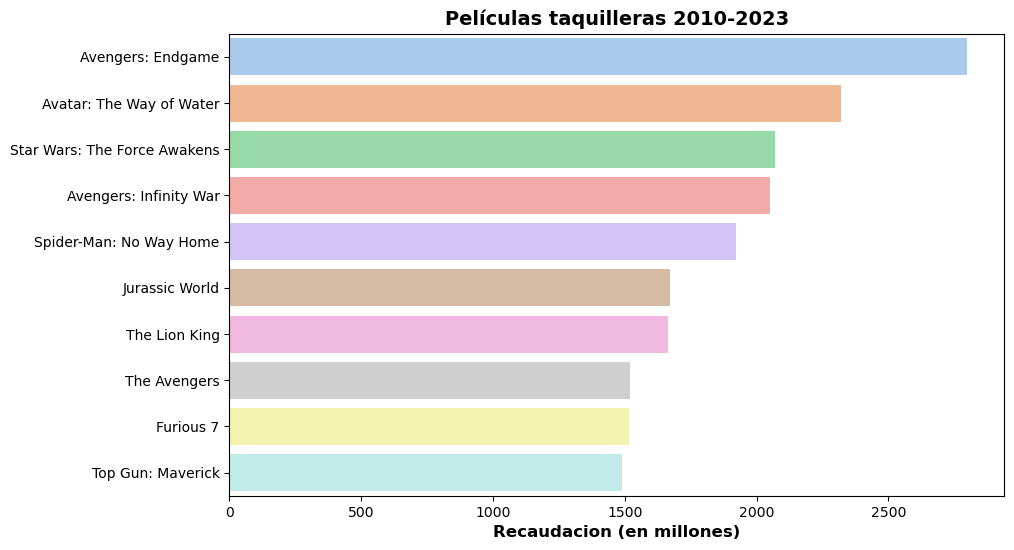

,Nombre,Recaudacion
141,Avengers: Endgame,2800.000000
138,Avatar: The Way of Water,2320.250281
1173,Star Wars: The Force Awakens,2068.223624
142,Avengers: Infinity War,2052.415039
1159,Spider-Man: No Way Home,1921.847111
684,Jurassic World,1671.537444
1428,The Lion King,1663.000000
1245,The Avengers,1518.815515
470,Furious 7,1515.400000
1606,Top Gun: Maverick,1488.732821


In [16]:
# Agrupar por año y productora cinematográfica
grupo_pelicula = df_peliculas_2010_2023.groupby('Nombre')['Recaudacion'].sum().reset_index()
# Ordenar los datos por 'Recaudacion' de forma descendente
data = grupo_pelicula.sort_values(by='Recaudacion', ascending=False)

# Tomar solo los primeros 10 datos
data_top10 = data.head(10)

# Crear la gráfica de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Recaudacion', y='Nombre', data=data_top10, palette='pastel')

# Configurar el estilo y etiquetas
plt.xlabel('Recaudacion (en millones)',fontsize=12, fontweight='bold', color='k')
# Eliminar la etiqueta del eje Y
plt.ylabel('')

plt.title('Películas taquilleras 2010-2023',fontsize=14, fontweight='bold', color='k')

# Mostrar la gráfica
plt.show()


data_top10